In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy
from scipy import stats as st
import numpy as np
import pickle
import cloudpickle

#  Выявление влияния маркетинговой компании на покупательскую активность клиентов

###  Цель исследований

   Целью исследований является выявление сравнительных особенностей поведения клиентов, как участвующих в маркетинговой компании, так и оказавшихся
вне ее влияния, а также оценка эффективности проведенной маркетинговой кампании с точки зрения истинного влияния на покупательскую активность

### ЭТАПЫ ВЫПОЛНЕНИЯ РАБОТЫ
1. [Загрузка и проверка данных](#start)
2. [Изучение выборок клиентов (A/B тест)](#start1)
3. [Изучение профилей клиентов, принимающих участие в A/B-тестировании](#start2)
4. [Сравнение покупательской активности и предпочтений клиентов до и во время рекламной акции](#start3)
5. [Выводы](#start4) 

## Загрузка и проверка данных
<a id="start"></a>

In [2]:
with open('fe.pkl', 'rb') as f:
    d = pickle.load(f)
ddf = pickle.loads(d)

In [5]:
df_m, df_t, df_p, df_c, df_k = ddf()

In [6]:
df_m[:3]

,Person_BKEY,In_Action,Action_date,Sum_Purch_in_Action,Qnt_Purch_in_Action,Sum_from_Card
0,162,0,2019-03-21,195.00,1,0.0
1,359,1,2019-03-21,1298.93,3,300.0
2,600,1,2019-03-21,1224.17,1,-0.0


In [7]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Person_BKEY          500000 non-null  int64         
 1   In_Action            500000 non-null  int64         
 2   Action_date          500000 non-null  datetime64[ns]
 3   Sum_Purch_in_Action  500000 non-null  float64       
 4   Qnt_Purch_in_Action  500000 non-null  int64         
 5   Sum_from_Card        500000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 22.9 MB


In [8]:
df_m.duplicated().sum()

np.int64(0)

In [9]:
df_m['Action_date'] = pd.to_datetime(df_m['Action_date'])

In [10]:
df_m['In_Action'].value_counts()

In_Action
0    250018
1    249982
Name: count, dtype: int64

<div class="alert alert-info">
     Таблица с данными о пукупках клиентов в период рекламной кампании содержит 500 тыс строк, типы данных верные, дубликатов строк нет. 
В таблице представлна информация о 2 группах клиентов - участвующих в акции и не участвующих. Количество клиентов в обеих группах примерно 
одинаково (250,018 тыс и 249,982 тыс.).
</div>

In [11]:
df_t[:3]

,Goods_BKEY,cat_lev_01_BKEY,cat_lev_02_BKEY,Cat_lev_03_BKEY,Cat_lev_04_BKEY,Attribut_01,Brand_BKEY,Manufator_BKEY,Waight,Self_Brand_flag,Alco_flag
0,5333,0,38,101,746,259.0,1683,2183,0.30,0,0
1,3875,0,38,101,746,259.0,1683,2183,0.70,0,0
2,3726,0,38,101,746,259.0,1683,2183,0.36,0,0


In [12]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43038 entries, 0 to 43037
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Goods_BKEY       43038 non-null  int64  
 1   cat_lev_01_BKEY  43038 non-null  int64  
 2   cat_lev_02_BKEY  43038 non-null  int64  
 3   Cat_lev_03_BKEY  43038 non-null  int64  
 4   Cat_lev_04_BKEY  43038 non-null  int64  
 5   Attribut_01      41466 non-null  float64
 6   Brand_BKEY       43038 non-null  int64  
 7   Manufator_BKEY   43038 non-null  int64  
 8   Waight           43035 non-null  float64
 9   Self_Brand_flag  43038 non-null  int64  
 10  Alco_flag        43038 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 3.6 MB


In [13]:
df_t.duplicated().sum()

np.int64(0)

<div class="alert alert-info">
     Таблица df_t содержит сведения о товарах, имеет 43038 строк, типы данных верные (float и int), дубликатов данных нет.
</div>

In [14]:
df_p[:3]

,Person_BKEY,First_Purch_date,Age,Gend
0,162,2018-07-06 19:36:04,52,F
1,359,2017-07-14 16:27:35,60,M
2,600,2017-10-10 12:22:44,82,M


In [15]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Person_BKEY       500000 non-null  int64         
 1   First_Purch_date  500000 non-null  datetime64[ns]
 2   Age               500000 non-null  int64         
 3   Gend              500000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 15.3+ MB


In [16]:
df_p.duplicated().sum()

np.int64(0)

In [17]:
df_p['First_Purch_date'] = pd.to_datetime(df_p['First_Purch_date'])

In [18]:
df_p.dtypes

Person_BKEY                  int64
First_Purch_date    datetime64[ns]
Age                          int64
Gend                        object
dtype: object

<div class="alert alert-info">
     Таблица df_p с профилями клиентов содержит 500 тыс записей, типы данных верные, кроме поля с датой первой покупки клиента, которое было 
переведено в тип datetime64. 
</div>

In [19]:
df_c[:5]

,Person_BKEY,Purchase_ID,Amount_Original,Amount,toCard_stand,toCard_short,fromCard_stand,fromCard_short,Amount_Cheque,Merchant_id,Opetation_datetime
0,0,4169120,0.0,804.0,8.0,0.0,0.0,0.0,803.0,81,2019-03-08 10:12:03
1,0,4962998,0.0,1007.0,10.0,0.0,0.0,0.0,1007.0,4557,2018-12-01 07:12:45
2,0,7048393,0.0,419.0,2.0,0.0,0.0,0.0,419.0,81,2019-03-14 15:01:47
3,0,7618050,0.0,575.0,5.7,0.0,0.0,0.0,574.0,12891,2018-12-16 08:56:01
4,1,402585,0.0,700.0,7.0,0.0,0.0,0.0,700.0,3166,2018-12-21 11:08:58


In [20]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10065266 entries, 0 to 10065265
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Person_BKEY         int64         
 1   Purchase_ID         int64         
 2   Amount_Original     float64       
 3   Amount              float64       
 4   toCard_stand        float64       
 5   toCard_short        float64       
 6   fromCard_stand      float64       
 7   fromCard_short      float64       
 8   Amount_Cheque       float64       
 9   Merchant_id         int64         
 10  Opetation_datetime  datetime64[us]
dtypes: datetime64[us](1), float64(7), int64(3)
memory usage: 921.5 MB


In [21]:
df_c.duplicated().sum()

np.int64(0)

<div class="alert alert-info">
     Таблица df_с содержит информацию о товарах, которые приобретали клиенты, и стоимости заказов. Таблица включает более 10 млн строк и 10 полей,
все типы данных определены верно, дубликатов данных нет. 
</div>

In [22]:
df_k[:5]

,Person_BKEY,Purchase_ID,Opetation_datetime,toCard_stand,toCard_short,fromCard_stand,fromCard_short,Amount_Cheque,Merchant_id,Goods_BKEY,Qnt,Amount,Amount_Original
0,162,5681805,2018-12-26 11:35:21,2.1,0.0,0.0,0.0,434.97,560,30531,1.0,77.0,NaN
1,162,2655010,2018-12-24 15:50:50,0.8,0.0,0.0,0.0,167.00,560,668,1.0,70.0,NaN
2,162,5681805,2018-12-26 11:35:21,2.1,0.0,0.0,0.0,434.97,560,15558,1.0,28.0,NaN
3,162,2655010,2018-12-24 15:50:50,0.8,0.0,0.0,0.0,167.00,560,24637,1.0,57.0,NaN
4,162,5681805,2018-12-26 11:35:21,2.1,0.0,0.0,0.0,434.97,560,31933,2.0,162.0,NaN


In [23]:
df_k.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57149006 entries, 0 to 36049005
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Person_BKEY         int64         
 1   Purchase_ID         int64         
 2   Opetation_datetime  datetime64[us]
 3   toCard_stand        float64       
 4   toCard_short        float64       
 5   fromCard_stand      float64       
 6   fromCard_short      float64       
 7   Amount_Cheque       float64       
 8   Merchant_id         int64         
 9   Goods_BKEY          int64         
 10  Qnt                 float64       
 11  Amount              float64       
 12  Amount_Original     float64       
dtypes: datetime64[us](1), float64(8), int64(4)
memory usage: 6.0 GB


In [24]:
df_k.duplicated().sum()

np.int64(0)

<div class="alert alert-info">
     Таблица df_k содержит информацию о покупках клиентов и состоит из более 51 млн строк и 13 полей, все типы данных определены верно, дубликатов
нет.
</div>

## Изучение выборок клиентов (A/B тест)
<a id="start1"></a>

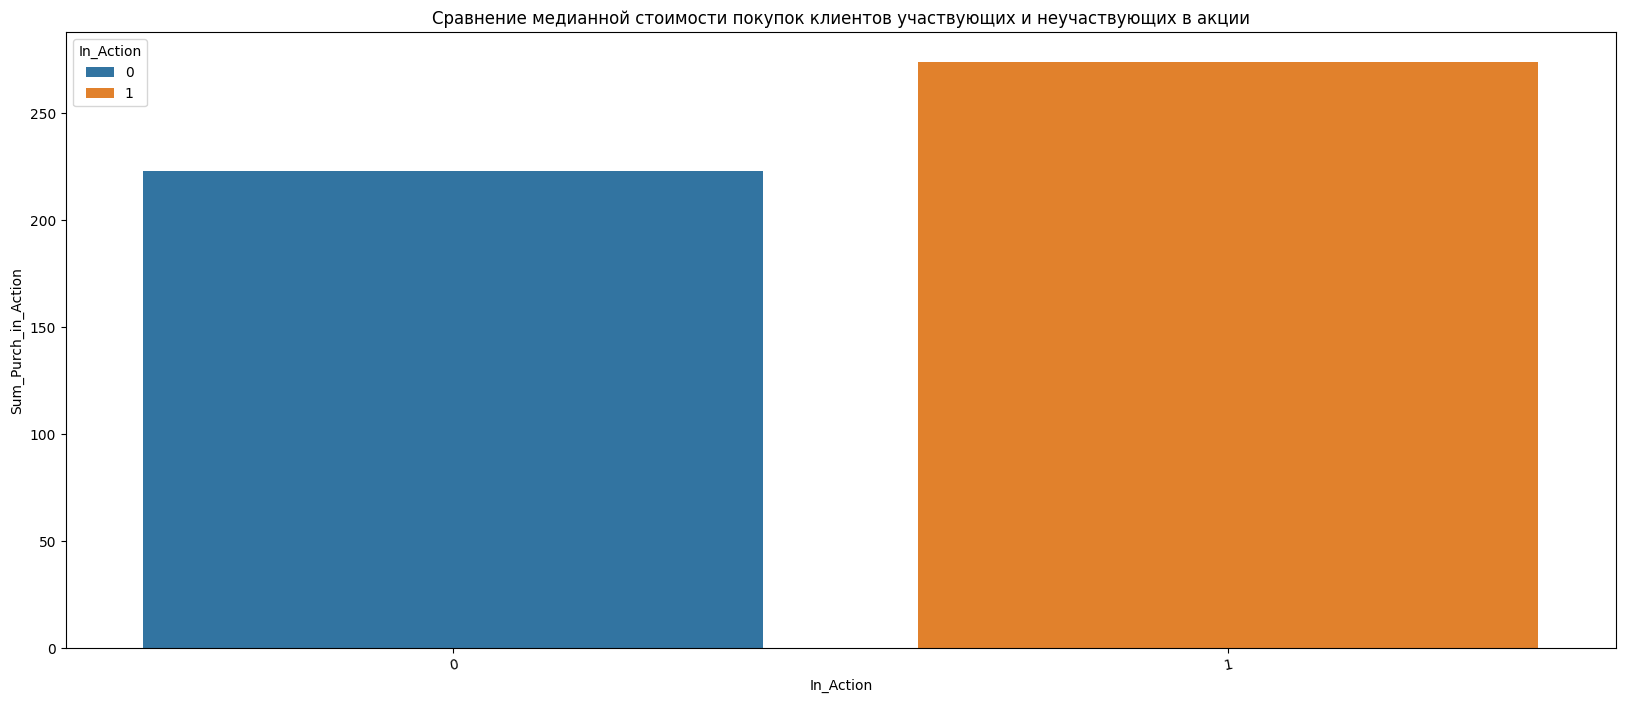

In [25]:
plt.subplots(figsize=(20, 8))
sns.barplot(data = df_m.pivot_table(index = 'In_Action', values = 'Sum_Purch_in_Action', aggfunc = 'median'),  y = 'Sum_Purch_in_Action', x = 'In_Action', hue = 'In_Action')
plt.title('Сравнение медианной стоимости покупок клиентов участвующих и неучаствующих в акции')
plt.xticks(rotation = 10);

<div class="alert alert-info">
     Медианный чек клиентов, участвующих в акции, почти на 20 % больше, чем для клиентов вне акции.
</div>

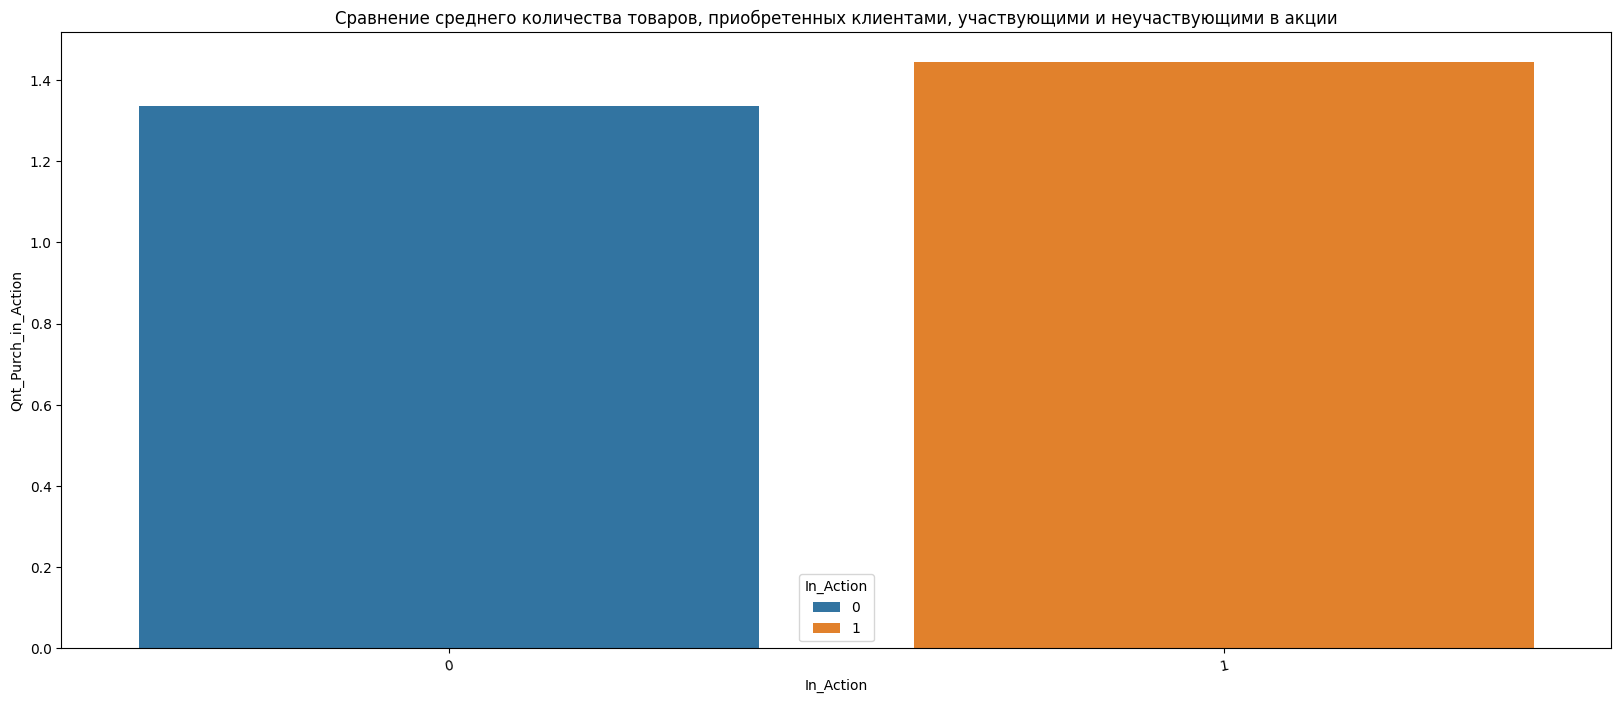

In [26]:
plt.subplots(figsize=(20, 8))
sns.barplot(data = df_m.pivot_table(index = 'In_Action', values = 'Qnt_Purch_in_Action', aggfunc = 'mean'),  y = 'Qnt_Purch_in_Action', x = 'In_Action', hue = 'In_Action')
plt.title('Сравнение среднего количества товаров, приобретенных клиентами, участвующими и неучаствующими в акции')
plt.xticks(rotation = 10);

<div class="alert alert-info">
     Клиенты, участвующие в акции, приобретали, в среднем, больше товаров (1,4), по сраванению с клиентами вне акции (1,3). 
</div>

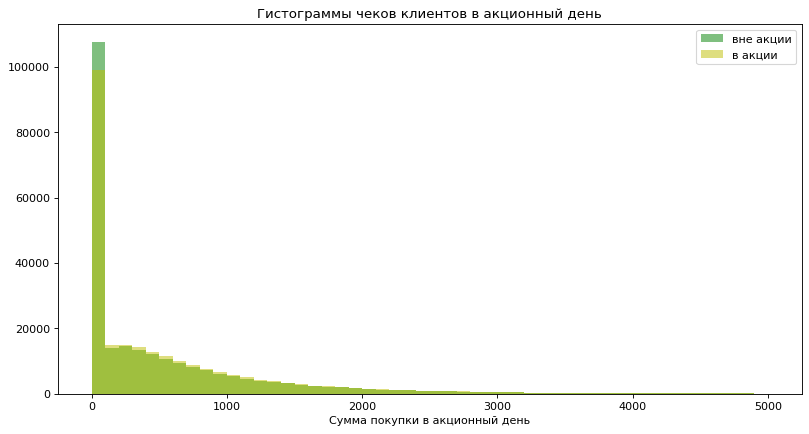

In [27]:
figure(figsize=(12, 6), dpi=80)
plt.hist(df_m.query('In_Action == 0')['Sum_Purch_in_Action'], 50, alpha=0.5, color = 'g', label='вне акции', range=(0, 5000))
plt.hist(df_m.query('In_Action == 1')['Sum_Purch_in_Action'], 50, alpha=0.5, color = 'y', label='в акции', range=(0, 5000))
plt.legend(loc='upper right')
plt.ylabel('')
plt.xlabel('Сумма покупки в акционный день');
plt.title('Гистограммы чеков клиентов в акционный день')
plt.show()

<div class="alert alert-info">
     Чеки участвующих и неучаствующих в акции клиентов распределены в интервале от 0 до 50000. Распределение далеко от нормального:
большинство клиентов (более 80 %) в обеих группах имеют чек от 0 до 1000. В обеих группах выделяется большое количество клиентов с нулевым чеком
(число клиентов с нулевым чеком немного больше в группе вне акции). 
</div>

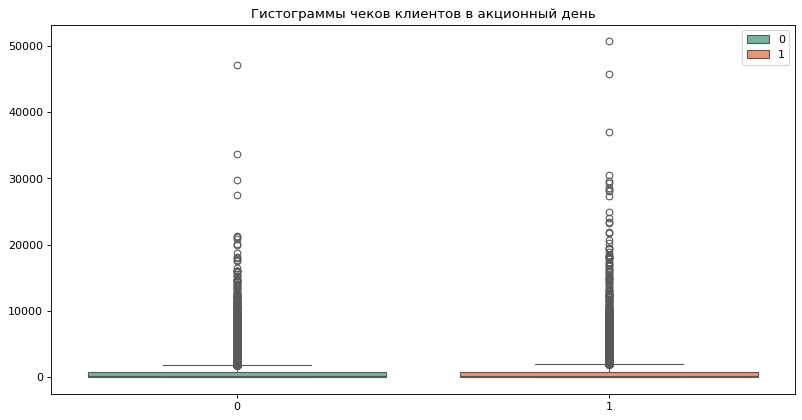

In [28]:
figure(figsize=(12, 6), dpi=80)
sns.boxplot(data = df_m, y = df_m['Sum_Purch_in_Action'], x = 'In_Action', hue = 'In_Action', palette="Set2")
plt.legend(loc='upper right')
plt.ylabel('')
plt.xlabel('');
plt.title('Гистограммы чеков клиентов в акционный день')
plt.show()

<div class="alert alert-info">
     В обеих выборках распределения чеков содержит большое число выбросов свыше суммы 2000 и до 50000.
</div>

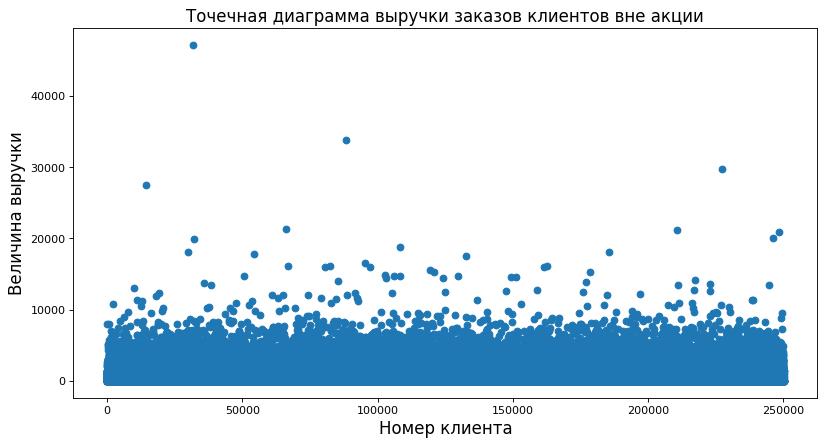

In [29]:
plt.figure(figsize=(12, 6), dpi=80)
d = range(len(df_m.loc[df_m['In_Action'] == 0, 'Sum_Purch_in_Action']))
plt.scatter(d, df_m.loc[df_m['In_Action'] == 0, 'Sum_Purch_in_Action']);
plt.title('Точечная диаграмма выручки заказов клиентов вне акции', fontsize = 15)
plt.xlabel('Номер клиента', fontsize=15)
plt.ylabel('Величина выручки', fontsize=15);

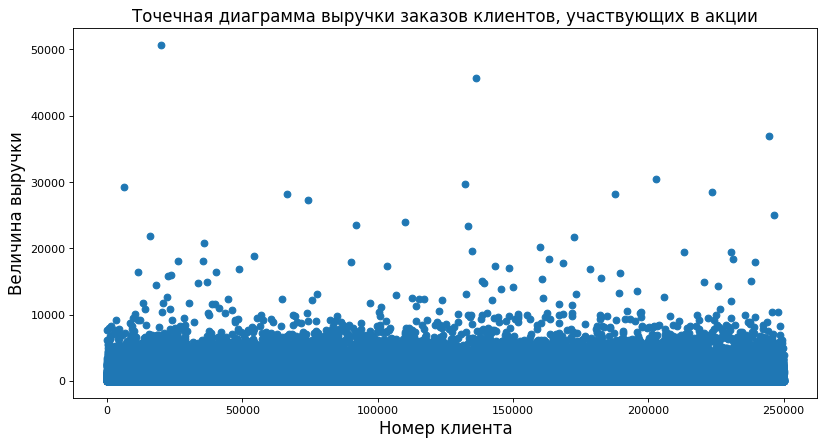

In [30]:
plt.figure(figsize=(12, 6), dpi=80)
d = range(len(df_m.loc[df_m['In_Action'] == 1, 'Sum_Purch_in_Action']))
plt.scatter(d, df_m.loc[df_m['In_Action'] == 1, 'Sum_Purch_in_Action']);
plt.title('Точечная диаграмма выручки заказов клиентов, участвующих в акции', fontsize = 15)
plt.xlabel('Номер клиента', fontsize=15)
plt.ylabel('Величина выручки', fontsize=15);

<div class="alert alert-info">
     Обе выборки участвующих и не участвующих в акции клиентов имеют большое количество выбросов выручки (чеков), визуально локализованных в интервале
1000 - 20000.
</div>

In [31]:
df_m.loc[df_m['In_Action'] == 0, 'Sum_Purch_in_Action'].describe()

count    250018.000000
mean        551.972492
std         895.332070
min           0.000000
25%           0.000000
50%         223.000000
75%         768.452500
max       47128.420000
Name: Sum_Purch_in_Action, dtype: float64

In [32]:
df_m.loc[df_m['In_Action'] == 1, 'Sum_Purch_in_Action'].describe()

count    249982.000000
mean        585.616540
std         930.155286
min           0.000000
25%           0.000000
50%         274.000000
75%         814.562500
max       50669.140000
Name: Sum_Purch_in_Action, dtype: float64

<div class="alert alert-info">
     Обе выборки клиентов имеют большой разброс чеков в акционный день: от 0 до 47120 (вне акции) и от 0 до 50669 (в акции). Средний и медианный чеки 
клиентов в акции (585 и 274) немного выше, по сравнению с чеками вне акции (551 и 223). Дисперсия чеков в акции (930**2) также немного выше, 
по сравнению с дисперсией чеков вне акции (895**2).
</div>

In [33]:
np.percentile(df_m.query('In_Action == 0')['Sum_Purch_in_Action'], [95, 97.5, 99])

array([2168.613 , 2904.    , 3996.3237])

In [34]:
np.percentile(df_m.query('In_Action == 1')['Sum_Purch_in_Action'], [95, 97.5, 99])

array([2223., 2958., 4084.])

<div class="alert alert-info">
     Для статистических исследований данные в выборках чеков клиентов необходимо очистить от выбросов. Для этого определены перцеентили 95, 97,5 и 99. 
Для очистки от выбросов для обеих выборок был выбран перцентиль 95, так как он близок по величине к верхней допустимой границе варьирования выборок 
[mean + 3*std] (в приближении нормального распределения). 
</div>

In [35]:
stat, p = scipy.stats.shapiro(df_m.query('In_Action == 0 and Sum_Purch_in_Action < 2168')['Sum_Purch_in_Action'])

C:\Users\79284\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 237508.
  res = hypotest_fun_out(*samples, **kwds)


In [36]:
p.tolist()

7.156500764701123e-154

In [37]:
stat, p = scipy.stats.shapiro(df_m.query('In_Action == 1 and Sum_Purch_in_Action < 2223')['Sum_Purch_in_Action'])

C:\Users\79284\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 237480.
  res = hypotest_fun_out(*samples, **kwds)


In [38]:
p.tolist()

1.573740030652341e-150

<div class="alert alert-info">
     Провека по критерию Шапиро-Уилка показывает отсутствие нормального распределения выборок чеков в обеих группаx (p-value << 0.05)
</div>

In [39]:
stat, p = scipy.stats.normaltest(df_m.query('In_Action == 0 and Sum_Purch_in_Action < 2160')['Sum_Purch_in_Action'])

In [40]:
p.tolist()

0.0

In [41]:
stat, p = scipy.stats.normaltest(df_m.query('In_Action == 1 and Sum_Purch_in_Action < 2223')['Sum_Purch_in_Action'])

In [42]:
p.tolist()

0.0

<div class="alert alert-info">
     Провека по критерию Пирсона также показывает отсутствие нормального распределения в выборках чеков в обеих группаx (p-value близко к 0)
</div>

In [43]:
st.mannwhitneyu(df_m.query('In_Action == 0 and Sum_Purch_in_Action < 2160')['Sum_Purch_in_Action'],df_m.query('In_Action == 1 and Sum_Purch_in_Action < 2223')['Sum_Purch_in_Action'],True,'two-sided').pvalue

np.float64(3.8038841812974175e-144)

In [44]:
st.mannwhitneyu(df_m.query('In_Action == 0 and Sum_Purch_in_Action < 2160')['Sum_Purch_in_Action'],df_m.query('In_Action == 1 and Sum_Purch_in_Action < 2223')['Sum_Purch_in_Action'],True,'less').pvalue

np.float64(1.9019420906487087e-144)

In [45]:
st.mannwhitneyu(df_m.query('In_Action == 0 and Sum_Purch_in_Action < 2160')['Sum_Purch_in_Action'],df_m.query('In_Action == 1 and Sum_Purch_in_Action < 2223')['Sum_Purch_in_Action'],True,'greater').pvalue

np.float64(1.0)

<div class="alert alert-info">
     Так как распределение чеков в обеих группах далеко от нормального, то для сравнения выборок выбран непрараметрический критерий Манна-Уитни.
Нулевая гипотеза Н0: генеральные совокупности (ГС) акционных и внеакционных чеков равны между совой. Альтернативные гипотезы: ГС внеакционных чеков
меньше, чем ГС акционных чеков (H1'less'), ГС внеакционных чеков больше, чем ГС акционных чеков (H1'greater'). Уровень статистической значимости 
a = 0.01. Для нулевой гипотезы H0 << a, поэтому гипотезу о равенстве ГС можно отбросить. Гипотеза H1'less' также имеет p-value << a, поэтому ее также 
отбрасываем. Гипотеза H1 'greater'о том, что ГС акционных чеков больше, чем ГС внеакционных чеков, имеет p-value = 1, то есть нет основания отвергать
данную гипотезу. Таким образом, статистический тест показывает, что ГС акционных чеков больше, по сравнению с ГС чеков елиентов, не участвующих 
в акциии. 
</div>

In [46]:
s_1 = len(df_m.loc[df_m['In_Action'] == 0, 'Sum_Purch_in_Action'])-1
s_2 = len(df_m.loc[df_m['In_Action'] == 1, 'Sum_Purch_in_Action'])-1
m_1 = np.mean(df_m.loc[df_m['In_Action'] == 0, 'Sum_Purch_in_Action'])
m_2 = np.mean(df_m.loc[df_m['In_Action'] == 1, 'Sum_Purch_in_Action'])
std_1 = np.std(df_m.loc[df_m['In_Action'] == 0, 'Sum_Purch_in_Action'], ddof=1)
std_2 = np.std(df_m.loc[df_m['In_Action'] == 1, 'Sum_Purch_in_Action'], ddof=1)

In [47]:
Confidence_interval_t_1 = st.t.interval(confidence=0.95, df=s_1, loc=m_1, scale = std_1/np.sqrt(s_1+1))

In [48]:
Confidence_interval_t_1

(np.float64(548.4629636694804), np.float64(555.4820194117374))

In [49]:
Confidence_interval_t_2 = st.t.interval(confidence=0.95, df=s_2, loc=m_2, scale = std_2/np.sqrt(s_2+1))

In [50]:
Confidence_interval_t_2

(np.float64(581.9702497471044), np.float64(589.2628310347122))

<div class="alert alert-info">
     Найдены доверительные 95 % интервалы ГС акционных и внеакционных чеков, которые показывают, что среднее значение ГС акционных чеков лежит 
в интервале [582, 589], который расположен заметно выше интервала локализации среднего значения ГС внеакционных чеков [548, 555].
</div>

## Изучение профилей клиентов, принимающих участие в A/B-тестировании
<a id="start2"></a>

In [51]:
df_n = df_m.merge(df_p, on = 'Person_BKEY', how = 'inner')

In [52]:
df_n[:5]

,Person_BKEY,In_Action,Action_date,Sum_Purch_in_Action,Qnt_Purch_in_Action,Sum_from_Card,First_Purch_date,Age,Gend
0,162,0,2019-03-21,195.00,1,0.0,2018-07-06 19:36:04,52,F
1,359,1,2019-03-21,1298.93,3,300.0,2017-07-14 16:27:35,60,M
2,600,1,2019-03-21,1224.17,1,-0.0,2017-10-10 12:22:44,82,M
3,1042,1,2019-03-21,313.18,2,300.0,2017-11-26 11:21:29,40,U
4,1080,1,2019-03-21,0.00,0,-0.0,2018-02-21 19:08:56,21,U


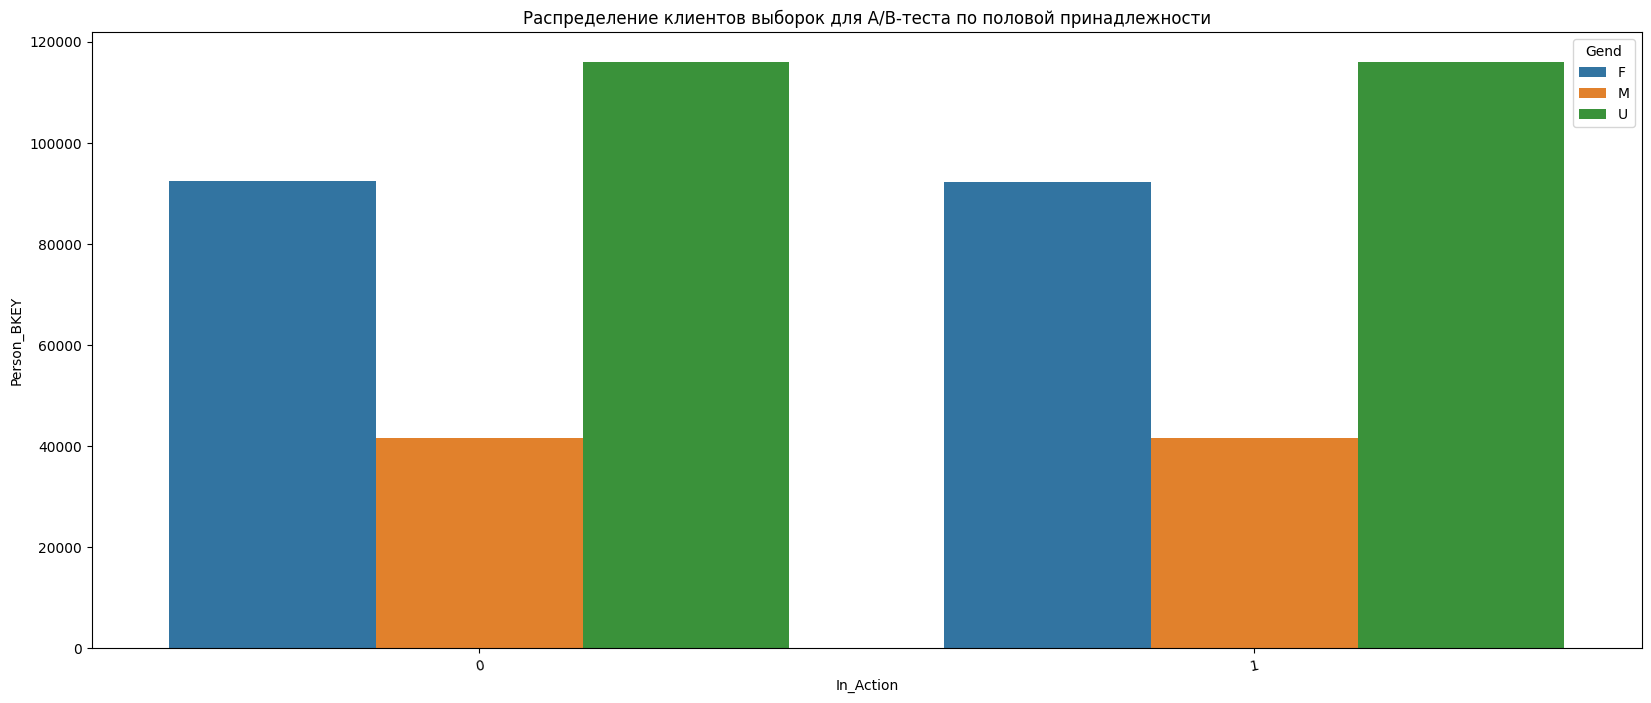

In [53]:
plt.subplots(figsize=(20, 8))
sns.barplot(data = df_n.groupby(['In_Action','Gend'], as_index = False).agg({'Person_BKEY':'count'}), y = 'Person_BKEY', x = 'In_Action', hue = 'Gend')
plt.title('Распределение клиентов выборок для A/B-теста по половой принадлежности')
plt.xticks(rotation = 10);

<div class="alert alert-info">
     Составы покупателей в обеих выборках для A/B-тестирования идентичны по половой принадлежности.
</div>

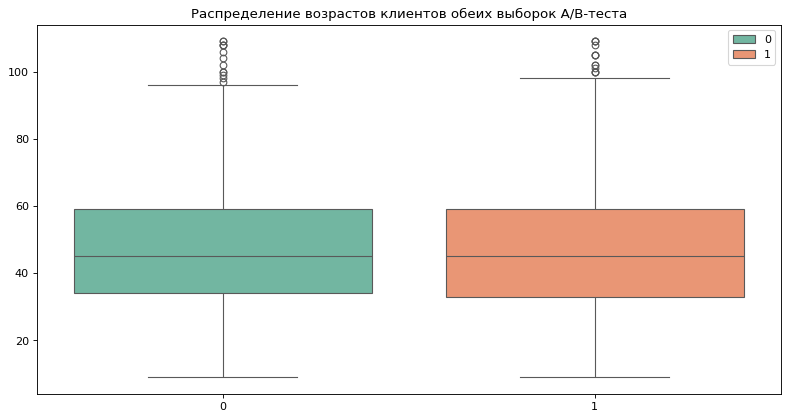

In [54]:
figure(figsize=(12, 6), dpi=80)
sns.boxplot(data = df_n.query('Age < 110 and Age > 8'), y = 'Age', x = 'In_Action', hue = 'In_Action', palette="Set2")
plt.legend(loc='upper right')
plt.ylabel('')
plt.xlabel('');
plt.title('Распределение возрастов клиентов обеих выборок A/B-теста')
plt.show()

<div class="alert alert-info">
     Поле 'Age' содержит большое число фейковых данных, очистив от которых, получаем индентичные возрастные составы обеих выборок.
</div>

In [55]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Person_BKEY          500000 non-null  int64         
 1   In_Action            500000 non-null  int64         
 2   Action_date          500000 non-null  datetime64[ns]
 3   Sum_Purch_in_Action  500000 non-null  float64       
 4   Qnt_Purch_in_Action  500000 non-null  int64         
 5   Sum_from_Card        500000 non-null  float64       
 6   First_Purch_date     500000 non-null  datetime64[ns]
 7   Age                  500000 non-null  int64         
 8   Gend                 500000 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(4), object(1)
memory usage: 34.3+ MB


In [56]:
df_n['First_Purch_date'] = df_n['First_Purch_date'].dt.date

In [57]:
df_n['First_Purch_date'] =  pd.to_datetime(df_n['First_Purch_date'])

In [58]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Person_BKEY          500000 non-null  int64         
 1   In_Action            500000 non-null  int64         
 2   Action_date          500000 non-null  datetime64[ns]
 3   Sum_Purch_in_Action  500000 non-null  float64       
 4   Qnt_Purch_in_Action  500000 non-null  int64         
 5   Sum_from_Card        500000 non-null  float64       
 6   First_Purch_date     500000 non-null  datetime64[ns]
 7   Age                  500000 non-null  int64         
 8   Gend                 500000 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(4), object(1)
memory usage: 34.3+ MB


In [59]:
df_n['lifetime'] = round((df_n.Action_date - df_n.First_Purch_date)/(np.timedelta64(1,'D')*30))

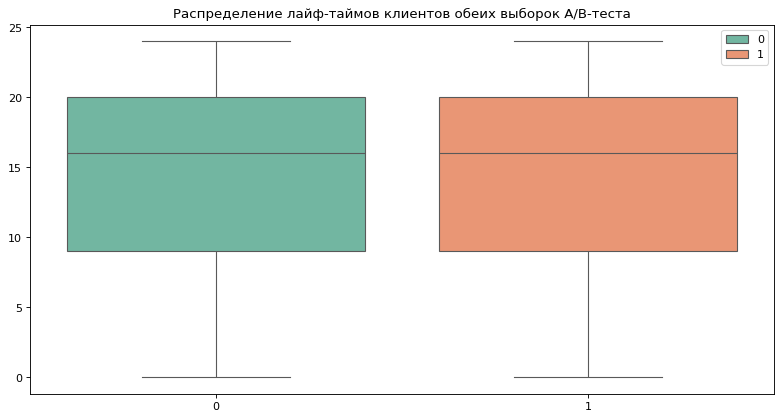

In [61]:
figure(figsize=(12, 6), dpi=80)
sns.boxplot(data = df_n, y = 'lifetime', x = 'In_Action', hue = 'In_Action', palette="Set2")
plt.legend(loc='upper right')
plt.ylabel('')
plt.xlabel('');
plt.title('Распределение лайф-таймов клиентов обеих выборок A/B-теста')
plt.show()

<div class="alert alert-info">
     Времена жизни (лайф-таймы) клиентов (от первой покупки до акционного дня) распределены идентично в обеих выборках A/B-теста
с медианным лайф-таймом 16 мес, выбросов данных нет. 
</div>

In [62]:
def s(d):
    if d < 14:
        return 'kids'
    elif d>=14 and d<20:
        return 'teens'
    elif d>=20 and d<35:
        return 'youth'
    elif d>=35 and d<65:
        return 'adults'
    else:
        return 'elders'
df_nn = df_n.query('Age < 110 and Age > 8')
df_nn['age_category'] = df_n['Age'].apply(s)

C:\Users\79284\AppData\Local\Temp\ipykernel_12192\3004781053.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nn['age_category'] = df_n['Age'].apply(s)


In [63]:
df_nn[:3]

,Person_BKEY,In_Action,Action_date,Sum_Purch_in_Action,Qnt_Purch_in_Action,Sum_from_Card,First_Purch_date,Age,Gend,lifetime,age_category
0,162,0,2019-03-21,195.00,1,0.0,2018-07-06,52,F,9.0,adults
1,359,1,2019-03-21,1298.93,3,300.0,2017-07-14,60,M,20.0,adults
2,600,1,2019-03-21,1224.17,1,-0.0,2017-10-10,82,M,18.0,elders


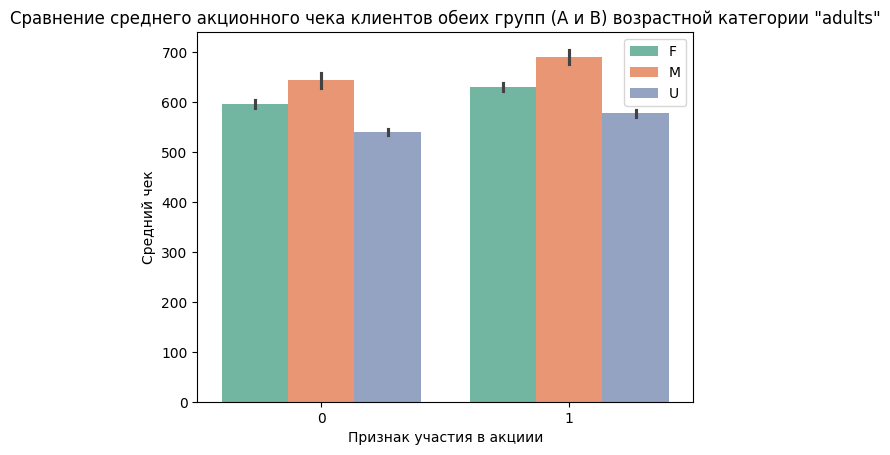

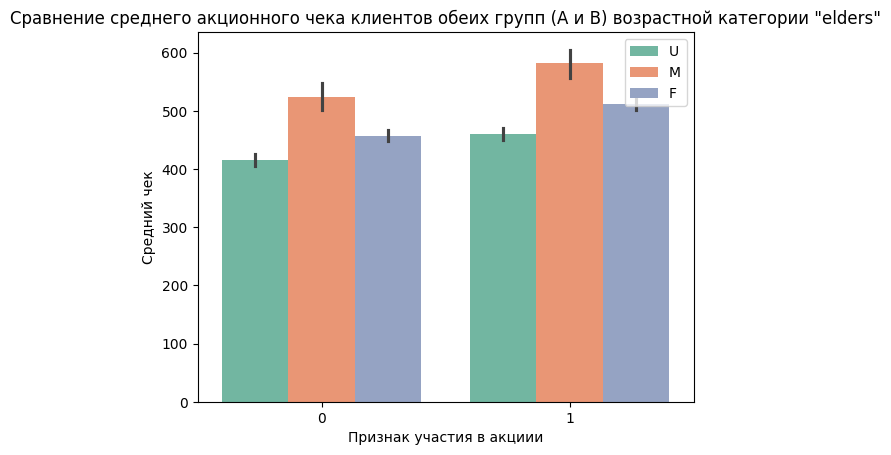

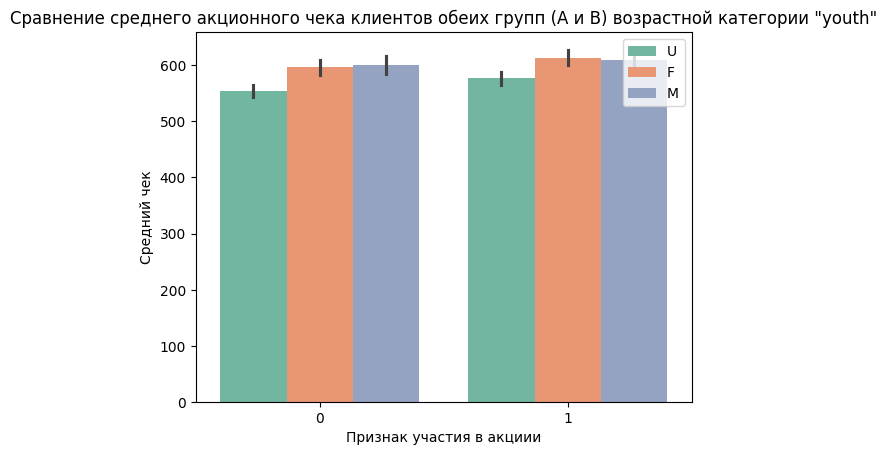

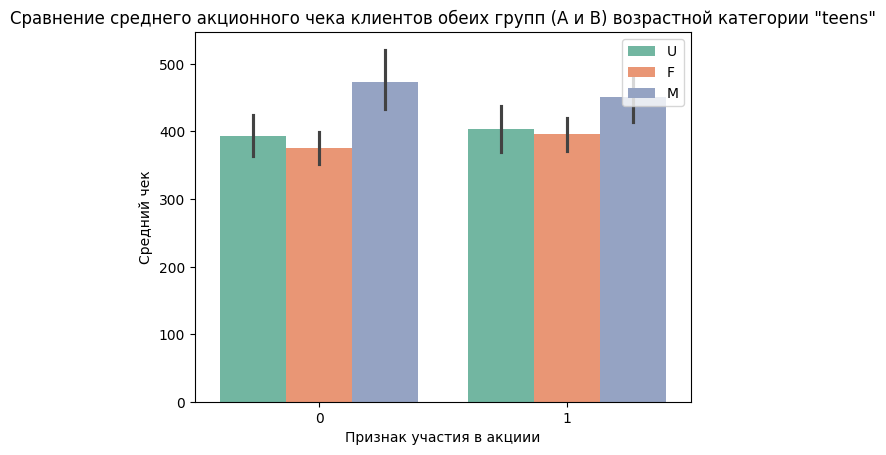

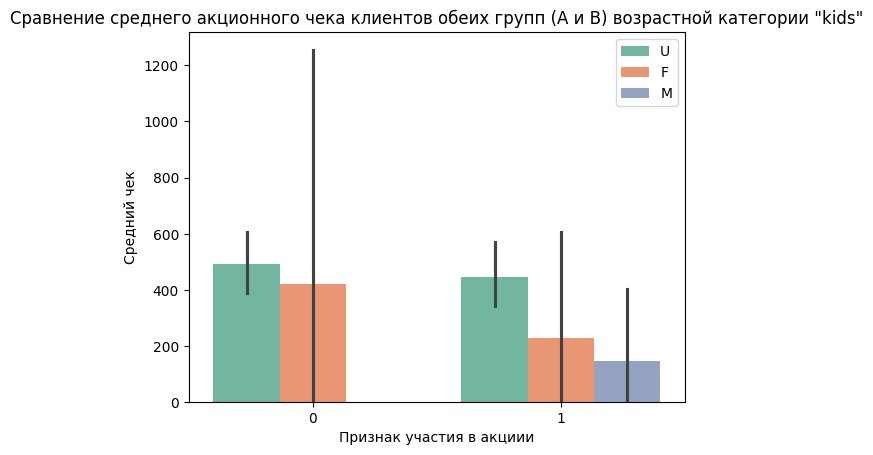

In [64]:
for i in df_nn['age_category'].unique():
    sns.barplot(data = df_nn.loc[df_nn['age_category'] == i], x = 'In_Action', y = 'Sum_Purch_in_Action', hue = 'Gend', palette="Set2")
    plt.legend(loc='upper right')
    plt.ylabel('Средний чек')
    plt.xlabel('Признак участия в акциии');
    plt.title('Сравнение среднего акционного чека клиентов обеих групп (A и B) возрастной категории "{}"'.format(i))
    plt.show()

<div class="alert alert-info">
     Сравнение средних чеков клиентов обеих групп A/B-теста в акционный день с учетом гендерной принадлежности показывает, что в акции наиболее 
активны (по тратам) взрослая часть клиентов ('adults' и 'elders'). Траты молодежи категории 'youth' индифферентны и не зависят от акции.
Остальные возрастные категории ('teens', 'kids'), участвующие в акции, тратят даже меньше, чем не участвующие.  
     В целом, во всех возрастных категориях (кроме 'youth' и 'kids') мужчины тратили в акционный день больше, чем женщины. Причем эта разница более
четко выражена именно в категориях акционных драйверов ('adults' и 'elders') Поэтому можно осторожно предположить, что эффективность акции связана с
воздействием на взрослую аудиторию (35+), причем в большей степени на мужчин. Однако, из-за большой выбраковки фейковых возрастных данных и наличия
большой категрии с неопределенным полом данный вывод может быть только приближенным.
</div>

In [65]:
def s(d):
    if d <= 1:
        return 'extra_short_lifetime'
    elif d > 1 and d <= 3:
        return 'short_lifetime'
    elif d > 3 and d <= 12:
        return 'average_lifetime'
    else:
        return 'long_lifetime'
df_nf = df_n.copy()
df_nf['cat_lifetime'] = df_n['lifetime'].apply(s)

In [66]:
df_nf[:3]

,Person_BKEY,In_Action,Action_date,Sum_Purch_in_Action,Qnt_Purch_in_Action,Sum_from_Card,First_Purch_date,Age,Gend,lifetime,cat_lifetime
0,162,0,2019-03-21,195.00,1,0.0,2018-07-06,52,F,9.0,average_lifetime
1,359,1,2019-03-21,1298.93,3,300.0,2017-07-14,60,M,20.0,long_lifetime
2,600,1,2019-03-21,1224.17,1,-0.0,2017-10-10,82,M,18.0,long_lifetime


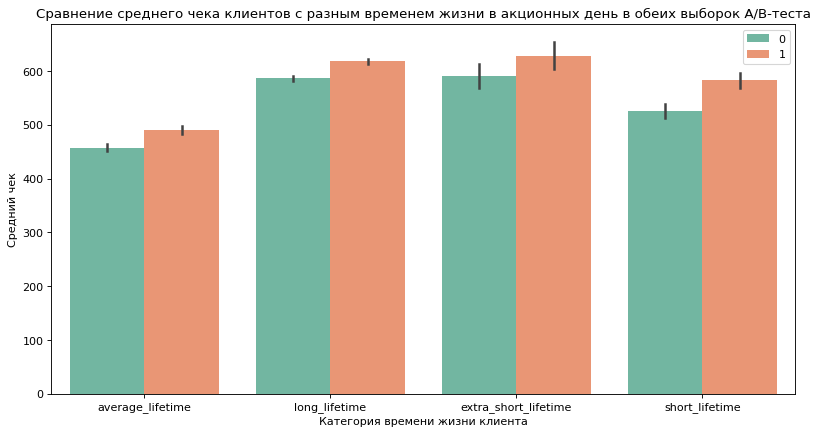

In [67]:
figure(figsize=(12, 6), dpi=80)
sns.barplot(data = df_nf, x = 'cat_lifetime', y = 'Sum_Purch_in_Action', hue = 'In_Action', palette="Set2")
plt.legend(loc='upper right')
plt.ylabel('Средний чек')
plt.xlabel('Категория времени жизни клиента');
plt.title('Сравнение среднего чека клиентов с разным временем жизни в акционных день в обеих выборок A/B-теста')
plt.show()

<div class="alert alert-info">
     Тенденции зависимости трат клиентов от срока их жизни одинаковы в обеих выборках A/B-теста. Больше всего средний чек в акционный день был 
у клиентов доительного срока жизни (более 12 мес) и очень короткого (менее 1 мес). Клиенты, участвующие в акции, во всех лаф-таймах тратили больше,
по сравнению с клиентами вне акции.
</div>

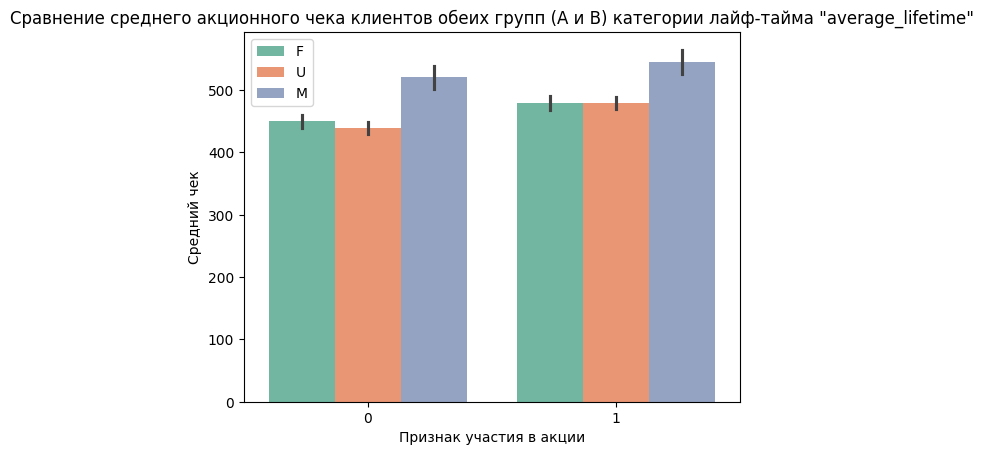

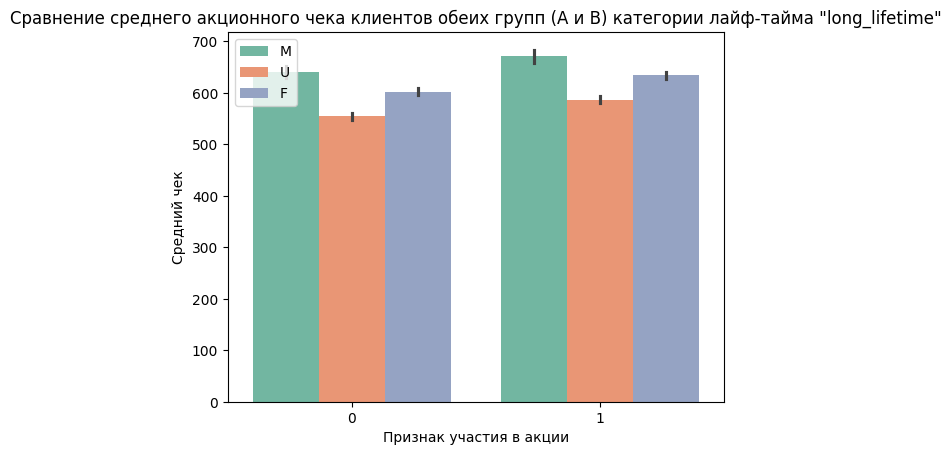

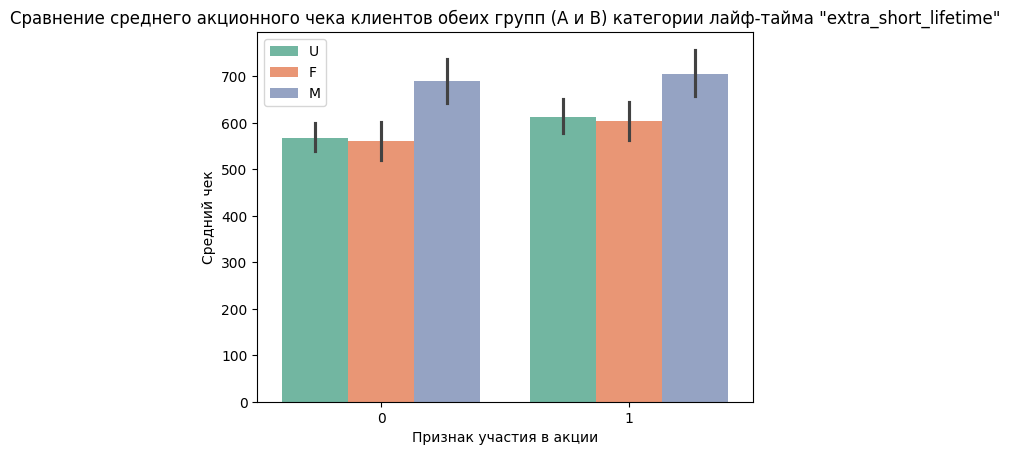

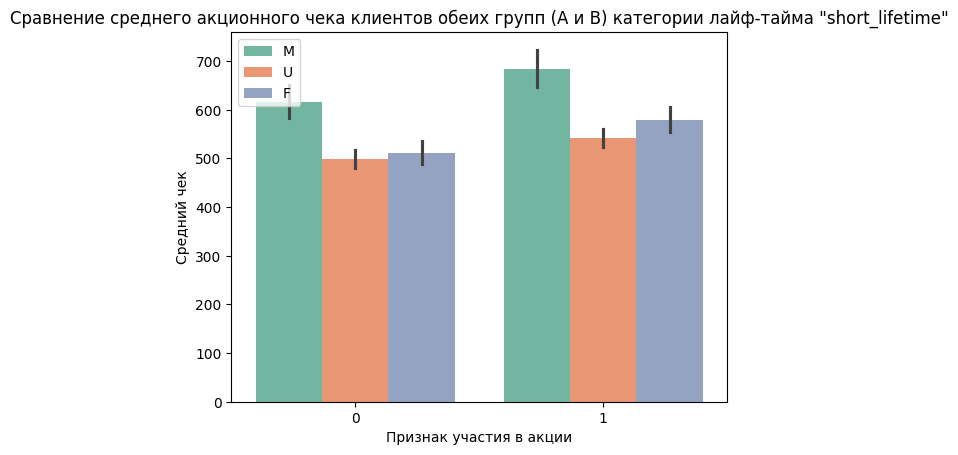

In [68]:
for i in df_nf['cat_lifetime'].unique():
    sns.barplot(data = df_nf.loc[df_nf['cat_lifetime'] == i], x = 'In_Action', y = 'Sum_Purch_in_Action', hue = 'Gend', palette="Set2")
    plt.legend(loc='upper left')
    plt.ylabel('Средний чек')
    plt.xlabel('Признак участия в акции');
    plt.title('Сравнение среднего акционного чека клиентов обеих групп (A и B) категории лайф-тайма "{}"'.format(i))
    plt.show()

<div class="alert alert-info">
     Во всех лайф-таймах траты мужчин в акционный день, в среднем, больше, чем женщин в обеих группах A/B-теста. Также во всех лайф-таймах средний чек
акционного дня во всех гендерах был выше в группе, участвующей в акции. То есть, акция действует примерно одинаково на клиентов с разным сроком 
жизни всех полов.
</div>

## Сравнение покупательской активности и предпочтений клиентов до и во время рекламной акции
<a id="start3"></a>

In [69]:
df_cc = df_c.query('Opetation_datetime < "2019-03-21"').groupby('Person_BKEY', as_index = False).agg({'Purchase_ID':'count','Amount_Cheque':'min'})

In [70]:
df_cc_1 = df_c.query('Opetation_datetime < "2019-03-21"').groupby('Person_BKEY', as_index = False).agg({'Amount_Cheque':'max'})

In [71]:
df_cc_2 = df_c.query('Opetation_datetime < "2019-03-21"').groupby('Person_BKEY', as_index = False).agg({'Amount_Cheque':'mean'})

In [72]:
df_cc_3 = df_c.query('Opetation_datetime < "2019-03-21"').groupby('Person_BKEY', as_index = False).agg({'Amount_Cheque':'sum'})

In [73]:
df_cc = df_cc.merge(df_cc_1, on = 'Person_BKEY')

In [74]:
df_cc = df_cc.merge(df_cc_2, on = 'Person_BKEY')

In [75]:
df_cc.rename(columns={'Amount_Cheque_x':'min_cheque', 'Amount_Cheque_y':'max_cheque', 'Amount_Cheque':'mean_cheque'},inplace=True)

In [76]:
df_cc = df_cc.merge(df_cc_3, on = 'Person_BKEY')

In [77]:
df_cc.rename(columns={'Amount_Cheque':'sum_cheque', 'Purchase_ID':'number_purchase'},inplace=True)

In [78]:
df_cc = df_cc.merge(df_n[['Person_BKEY','In_Action']], on = 'Person_BKEY')

In [79]:
df_cc = df_cc.merge(df_n[['Person_BKEY', 'Sum_Purch_in_Action','lifetime']], on = 'Person_BKEY')

In [80]:
def s(d):
    if d <= 1:
        return 'extra_short_lifetime'
    elif d > 1 and d <= 3:
        return 'short_lifetime'
    elif d > 3 and d <= 12:
        return 'average_lifetime'
    else:
        return 'long_lifetime'
df_cc['cat_lifetime'] = df_cc['lifetime'].apply(s)

In [81]:
df_cc[:3]

,Person_BKEY,number_purchase,min_cheque,max_cheque,mean_cheque,sum_cheque,In_Action,Sum_Purch_in_Action,lifetime,cat_lifetime
0,0,4,419.0,1007.0,700.75000,2803.0,0,909.0,20.0,long_lifetime
1,1,32,58.0,700.0,306.40625,9805.0,1,791.0,24.0,long_lifetime
2,2,8,113.0,1204.0,471.50000,3772.0,0,0.0,3.0,short_lifetime


<div class="alert alert-info">
     Для анализа затрат на покупки клиентов до акционной даты была сформирована таблица, содержащая информацию о количестве покупок клиентов,
минимальном, максимальном, среднем и суммарном чеке клиентов до даты акции. В таблицу также внесены лайф-таймы клиентов и их траты в акционный день. 
</div>

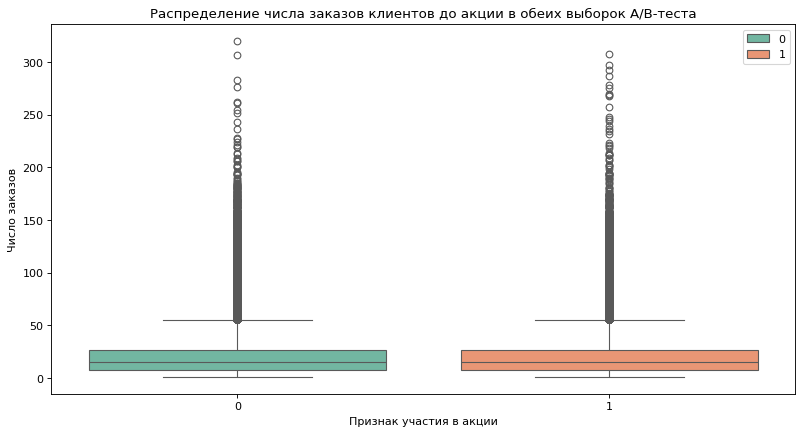

In [82]:
figure(figsize=(12, 6), dpi=80)
sns.boxplot(data = df_cc, y = 'number_purchase', x = 'In_Action', hue = 'In_Action', palette="Set2")
plt.legend(loc='upper right')
plt.ylabel('Число заказов')
plt.xlabel('Признак участия в акции');
plt.title('Распределение числа заказов клиентов до акции в обеих выборок A/B-теста')
plt.show()

<div class="alert alert-info">
     В обеих группах A/B-теста отсутствует разница в распределении количества заказов до акции. Медианное число заказов в обеих группа около 20, а 
также присутствует большое клоличество выбросов с числом заказов более 50.
</div>

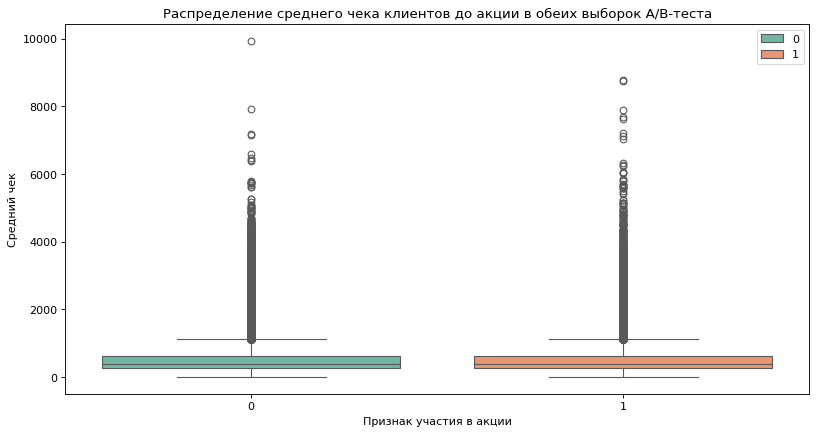

In [83]:
figure(figsize=(12, 6), dpi=80)
sns.boxplot(data = df_cc, y = 'mean_cheque', x = 'In_Action', hue = 'In_Action', palette="Set2")
plt.legend(loc='upper right')
plt.ylabel('Средний чек')
plt.xlabel('Признак участия в акции');
plt.title('Распределение среднего чека клиентов до акции в обеих выборок A/B-теста')
plt.show()

<div class="alert alert-info">
     В обеих группах A/B-теста распределения среднего чека до акции очень близки. Медианнай средний чек в обеих группа около 500, а 
также присутствует большое клоличество выбросов с числом заказов более 1500.
</div>

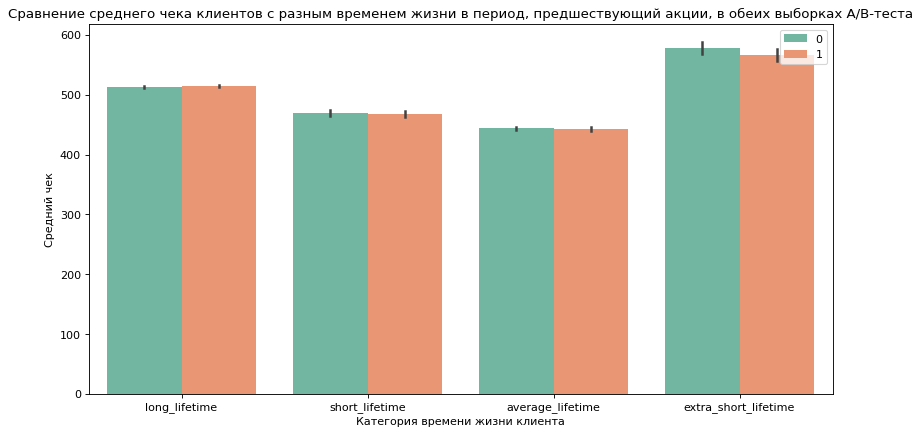

In [84]:
figure(figsize=(12, 6), dpi=80)
sns.barplot(data = df_cc, x = 'cat_lifetime', y = 'mean_cheque', hue = 'In_Action', palette="Set2")
plt.legend(loc='upper right')
plt.ylabel('Средний чек')
plt.xlabel('Категория времени жизни клиента');
plt.title('Сравнение среднего чека клиентов с разным временем жизни в период, предшествующий акции, в обеих выборках A/B-теста')
plt.show()

<div class="alert alert-info">
     Средние чеки клиентов в период до акции в разных лайф-таймах практически равны. Средние клиентов до акции с учетом времени жизни имеют ту же
тенденцию, что и в день акции - средний чек выше у клиентов с ультракоротким временем жизни (меньше 1 мес) и с длинным временем жизки (более 1 года) 
</div>

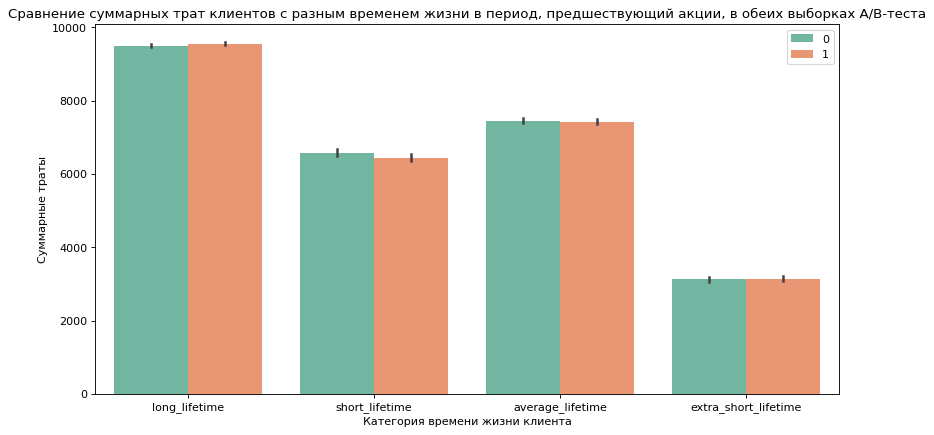

In [85]:
figure(figsize=(12, 6), dpi=80)
sns.barplot(data = df_cc, x = 'cat_lifetime', y = 'sum_cheque', hue = 'In_Action', palette="Set2")
plt.legend(loc='upper right')
plt.ylabel('Суммарные траты')
plt.xlabel('Категория времени жизни клиента');
plt.title('Сравнение суммарных трат клиентов с разным временем жизни в период, предшествующий акции, в обеих выборках A/B-теста')
plt.show()

<div class="alert alert-info">
     Суммарные траты клиентов в обеих выборках A/B-теста практически не отличаются в категориях с разными сроками жизни и распределеяются 
пропорционально лайф-тайму.
</div>

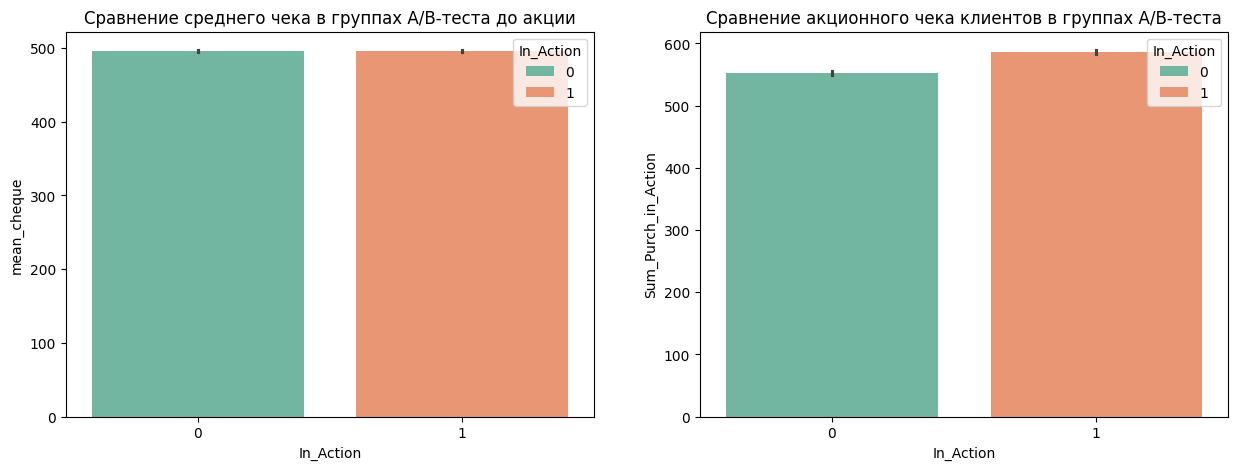

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.barplot(data = df_cc, y = 'mean_cheque', x = 'In_Action', hue = 'In_Action', ax=axes[0], palette="Set2")
axes[0].set_title('Сравнение среднего чека в группах A/B-теста до акции')
sns.barplot(data = df_cc, y = 'Sum_Purch_in_Action', x = 'In_Action', hue = 'In_Action', ax=axes[1], palette="Set2")
axes[1].set_title('Сравнение акционного чека клиентов в группах A/B-теста')
plt.show()

<div class="alert alert-info">
     Траты клиентов в акционный день в обеих группах A/B-теста выше среднего чека для этих же групп в период до акции. Средний чек до акции для 
обеих групп не превышает 500, в то время, как средние траты в день акции клиентов вне акции порядка 550, а клиентов, участвующих в акции - около 580.  
</div>

## Выводы
<a id="start4"></a>

<div class="alert alert-info"> 
 
   <b>Загрузка и проверка данных</b>

    Таблица с данными о пукупках клиентов в период рекламной кампании содержит 500 тыс строк, типы данных верные, дубликатов строк нет. 
В таблице представлна информация о 2 группах клиентов - участвующих в акции и не участвующих. Количество клиентов в обеих группах примерно 
одинаково (250,018 тыс и 249,982 тыс.). 
    Таблица со сведениями сведения о товарах имеет 43038 строк, типы данных верные (float и int), дубликатов данных нет.
    Таблица с профилями клиентов содержит 500 тыс записей, типы данных верные, кроме поля с датой первой покупки клиента, которое было 
переведено в тип datetime64. 
    Таблица с информацией о товарах, которые приобретали клиенты, и стоимости заказов. Таблица включает более 10 млн строк и 10 полей,
все типы данных определены верно, дубликатов данных нет.
    Таблица с информацией о покупках клиентов и состоит из более 51 млн строк и 13 полей, все типы данных определены верно, дубликатов
нет.

    <b> Изучение выборок клиентов (A/B-тест) </b>


     Медианный чек клиентов, участвующих в акции, почти на 20 % больше, чем для клиентов вне акции.
     Клиенты, участвующие в акции, приобретали, в среднем, больше товаров (1,4), по сраванению с клиентами вне акции (1,3).
     Чеки участвующих и неучаствующих в акции клиентов распределены в интервале от 0 до 50000. Распределение далеко от нормального:
большинство клиентов (более 80 %) в обеих группах имеют чек от 0 до 1000. В обеих группах выделяется большое количество клиентов с нулевым чеком
(число клиентов с нулевым чеком немного больше в группе вне акции). 
     В обеих выборках распределения чеков содержит большое число выбросов свыше суммы 2000 и до 50000.
    Обе выборки участвующих и не участвующих в акции клиентов имеют большое количество выбросов выручки (чеков), визуально локализованных в интервале
1000 - 20000.
    Обе выборки клиентов имеют большой разброс чеков в акционный день: от 0 до 47120 (вне акции) и от 0 до 50669 (в акции). Средний и медианный чеки 
клиентов в акции (585 и 274) немного выше, по сравнению с чеками вне акции (551 и 223). Дисперсия чеков в акции (930**2) также немного выше, 
по сравнению с дисперсией чеков вне акции (895**2).
    Для статистических исследований данные в выборках чеков клиентов необходимо очистить от выбросов. Для этого определены перцеентили 95, 97,5 и 99. 
Для очистки от выбросов для обеих выборок был выбран перцентиль 95, так как он близок по величине к верхней допустимой границе варьирования выборок 
[mean + 3*std] (в приближении нормального распределения). 
    Провека по критерию Шапиро-Уилка показывает отсутствие нормального распределения выборок чеков в обеих группаx (p-value << 0.05)
    Провека по критерию Пирсона также показывает отсутствие нормального распределения в выборках чеков в обеих группаx (p-value близко к 0)
    Так как распределение чеков в обеих группах далеко от нормального, то для сравнения выборок выбран непрараметрический критерий Манна-Уитни.
Нулевая гипотеза Н0: генеральные совокупности (ГС) акционных и внеакционных чеков равны между совой. Альтернативные гипотезы: ГС внеакционных чеков
меньше, чем ГС акционных чеков (H1'less'), ГС внеакционных чеков больше, чем ГС акционных чеков (H1'greater'). Уровень статистической значимости 
a = 0.01. Для нулевой гипотезы H0 << a, поэтому гипотезу о равенстве ГС можно отбросить. Гипотеза H1'less' также имеет p-value << a, поэтому ее также 
отбрасываем. Гипотеза H1 'greater'о том, что ГС акционных чеков больше, чем ГС внеакционных чеков, имеет p-value = 1, то есть нет основания отвергать
данную гипотезу. Таким образом, статистический тест показывает, что ГС акционных чеков больше, по сравнению с ГС чеков елиентов, не участвующих 
в акциии. 
    Найдены доверительные 95 % интервалы ГС акционных и внеакционных чеков, которые показывают, что среднее значение ГС акционных чеков лежит 
в интервале [582, 589], который расположен заметно выше интервала локализации среднего значения ГС внеакционных чеков [548, 555].

    <b> Изучение профилей клиентов, принимающих участие в A/B-тестировании </b>

     Составы покупателей в обеих выборках для A/B-тестирования идентичны по половой принадлежности.
     Поле 'Age' содержит большое число фейковых данных, очистив от которых, получаем индентичные возрастные составы обеих выборок.
     Времена жизни (лайф-таймы) клиентов (от первой покупки до акционного дня) распределены идентично в обеих выборках A/B-теста
с медианным лайф-таймом 16 мес, выбросов данных нет. 
     Сравнение средних чеков клиентов обеих групп A/B-теста в акционный день с учетом гендерной принадлежности показывает, что в акции наиболее 
активны (по тратам) взрослая часть клиентов ('adults' и 'elders'). Траты молодежи категории 'youth' индифферентны и не зависят от акции.
Остальные возрастные категории ('teens', 'kids'), участвующие в акции, тратят даже меньше, чем не участвующие.  
     В целом, во всех возрастных категориях (кроме 'youth' и 'kids') мужчины тратили в акционный день больше, чем женщины. Причем эта разница более
четко выражена именно в категориях акционных драйверов ('adults' и 'elders') Поэтому можно осторожно предположить, что эффективность акции связана с
воздействием на взрослую аудиторию (35+), причем в большей степени на мужчин. Однако, из-за большой выбраковки фейковых возрастных данных и наличия
большой категрии с неопределенным полом данный вывод может быть только приближенным.
    Тенденции зависимости трат клиентов от срока их жизни одинаковы в обеих выборках A/B-теста. Больше всего средний чек в акционный день был 
у клиентов доительного срока жизни (более 12 мес) и очень короткого (менее 1 мес). Клиенты, участвующие в акции, во всех лаф-таймах тратили больше,
по сравнению с клиентами вне акции.
    Во всех лайф-таймах траты мужчин в акционный день, в среднем, больше, чем женщин в обеих группах A/B-теста. Также во всех лайф-таймах средний чек
акционного дня во всех гендерах был выше в группе, участвующей в акции. То есть, акция действует примерно одинаково на клиентов с разным сроком 
жизни всех полов.

    <b> Сравнение покупательской активности и предпочтений клиентов до и во время рекламной акции </b>

    Для анализа затрат на покупки клиентов до акционной даты была сформирована таблица, содержащая информацию о количестве покупок клиентов,
минимальном, максимальном, среднем и суммарном чеке клиентов до даты акции. В таблицу также внесены лайф-таймы клиентов и их траты в акционный день. 
    В обеих группах A/B-теста отсутствует разница в распределении количества заказов до акции. Медианное число заказов в обеих группа около 20, а 
также присутствует большое клоличество выбросов с числом заказов более 50.
    В обеих группах A/B-теста распределения среднего чека до акции очень близки. Медианнай средний чек в обеих группа около 500, а 
также присутствует большое клоличество выбросов с числом заказов более 1500.
     Средние чеки клиентов в период до акции в разных лайф-таймах практически равны. Средние клиентов до акции с учетом времени жизни имеют ту же
тенденцию, что и в день акции - средний чек выше у клиентов с ультракоротким временем жизни (меньше 1 мес) и с длинным временем жизки (более 1 года) 
    Суммарные траты клиентов в обеих выборках A/B-теста практически не отличаются в категориях с разными сроками жизни и распределеяются 
пропорционально лайф-тайму.
    Траты клиентов в акционный день в обеих группах A/B-теста выше среднего чека для этих же групп в период до акции. Средний чек до акции для 
обеих групп не превышает 500, в то время, как средние траты в день акции клиентов вне акции порядка 550, а клиентов, участвующих в акции - около 580. 
    


## Рекомендации

1) A/B тестирование выполнено достаточно достоверно, выборки участвующих и неучаствующих в акции клиентов выбраны с учетом близкого распределения 
   по гендеру, возрасту и времени жизни клиентов. Статистическими методами показано, что проведенная акция эффективна, так как увеличивает средние 
   траты клиентов, участвующих в акции, по сравнению с клиентами вне акции.
2) В ходе исследований выяснилось, что клиенты-мужчины, в среднем, имеют более высокий средний чек, чем женщины. Кроме того, больше всего тратят на
   покупки свежие клиенты (лайф-тайм не более месяца) и постоянные клиенты (лайф-тайм более года).Таким образом, необходима акционная поддержка 
   клиентов-женщин, а также среднесрочных клиентов (время жизни от 1 мес до года), чтобы обеспечить максимально полную трансформацию новых когорт
   в постоянные клиенты. 
3) Данная акция эффективна, в основном, за счет клиентов взрослой возрастной категории (старше 35 лет), и практически не повышает покупательскую 
   активность молодежи. То есть, при проведении акций необходимы дополнительные шаги, направленные на увеличение привлекательности товаров для 
   подростков и молодежи до 35 лет.
4) В акционный день средние траты в обеих группах A/B-теста были выше, по сравнению со средним чеком клиентов за весь период до акции. Вероятно, это
   говорит о том, что в акционный день были предприняты дополнительные усилия, повышающую покупательскую активность всех категорий клиентов, как
   принимающих участие в акции, так и вне ее, что требует более глубокого анализа для внедрения данных мер в постоянную практику. 